In [192]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import gpflow
from gpflow.utilities import print_summary

$\mathbf{k}_{*u} == K(x_*,\mathbf{x_u})$

In [193]:
oldX = np.array([[1.0]])
oldY = np.array([[2.0]])
m = gpflow.models.GPR((oldX, oldY),kernel=gpflow.kernels.RBF(1.0))
postmean,postcov = m.predict_f(X,full_cov=True)

In [194]:
postcov[0,:,:].shape

TensorShape([11, 11])

In [195]:
X.shape

(11, 1)

In [196]:
cov.shape

TensorShape([1, 15, 15])

In [203]:
class Funky(gpflow.kernels.Kernel):
    def __init__(self):
        super().__init__(active_dims=[0])
        self.variance = gpflow.Parameter(1.0)

    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        oldX = np.array([[4.5]])
        oldY = np.array([[-1.0]])
        m = gpflow.models.GPR((oldX, oldY),kernel=gpflow.kernels.RBF(1.0))
        _,cov = m.predict_f(np.r_[X,X2],full_cov=True)
        postcov = cov[0,:X.shape[0],X.shape[0]:]

        return postcov #self.variance * tf.minimum(X, tf.transpose(X2))  # this returns a 2D tensor

    def K_diag(self, X):
        return tf.linalg.diag_part(k_brownian.K(X))[0,:] # self.variance * tf.reshape(X, (-1,))  # this returns a 1D tensor
        #np.diag(self.K(X,X)) #lazy #

k_funky = Funky()

In [204]:
def run_adam(model, iterations):
    """
    Utility function running the Adam optimizer

    :param model: GPflow model
    :param interations: number of iterations
    """
    # Create an Adam Optimizer action
    logf = []
    training_loss = model.training_loss_closure(data)
    optimizer = tf.optimizers.Adam()

    @tf.function
    def optimization_step():
        optimizer.minimize(training_loss, model.trainable_variables)

    for step in range(iterations):
        optimization_step()

In [205]:
N = 20
X = np.linspace(0,10,11)[:,None]
Y = np.ones_like(X)*10
data = (X,Y)

In [206]:
k = Funky()
k2 = gpflow.kernels.RBF()
#k = k1 + k2
m = gpflow.models.GPR((X, Y), kernel=k)

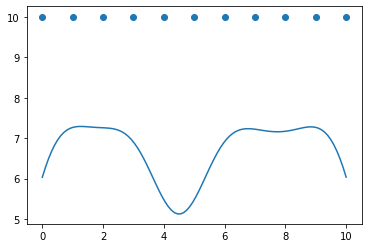

In [207]:
plt.scatter(X,Y)
Xtest = np.linspace(0,10,100)[:,None]
predmean,predvar = m.predict_f(Xtest)
plt.plot(Xtest,predmean)

In [208]:
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
#print_summary(m,fmt='notebook')

NotImplementedError: in converted code:

    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/optimizers/scipy.py:88 _tf_eval  *
        loss, grads = _compute_loss_and_gradients(closure, variables)
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/optimizers/scipy.py:145 _compute_loss_and_gradients  *
        loss = loss_closure()
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/models/training_mixins.py:50 training_loss  *
        return self._training_loss()
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/models/model.py:57 _training_loss  *
        return -(self.maximum_log_likelihood_objective(*args, **kwargs) + self.log_prior_density())
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/models/gpr.py:57 maximum_log_likelihood_objective  *
        return self.log_marginal_likelihood()
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/models/gpr.py:68 log_marginal_likelihood  *
        K = self.kernel(X)
    /home/mike/anaconda3/lib/python3.6/site-packages/gpflow/kernels/base.py:172 __call__  *
        return self.K(X, X2)
    <ipython-input-203-9490ab212936>:12 K  *
        _,cov = m.predict_f(np.r_[X,X2],full_cov=True)
    /home/mike/anaconda3/lib/python3.6/site-packages/numpy/lib/index_tricks.py:386 __getitem__
        item_ndim = ndim(item)
    <__array_function__ internals>:6 ndim
        
    /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3072 ndim
        return asarray(a).ndim
    /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85 asarray
        return array(a, dtype, copy=False, order=order)
    /home/mike/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:728 __array__
        " array.".format(self.name))

    NotImplementedError: Cannot convert a symbolic Tensor (GatherV2:0) to a numpy array.
